In [1]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import classification_report

%matplotlib inline

## Load the dataset

In [2]:
mypath = '/Users/yinzi/Downloads/crop_part1'
filenames = np.array([f for f in listdir(mypath) if isfile(join(mypath, f))])
splitcolumns = [x.split('_')[0:3] + [mypath +'/' + x] for x in filenames if x.count('_') == 3]
filecolumns = ['age','gender','race','file']
df = pd.DataFrame(data = splitcolumns, columns = filecolumns)

In [3]:
df.head(3)

,age,gender,race,file
0,9,1,2,/Users/yinzi/Downloads/crop_part1/9_1_2_201612...
1,1,1,2,/Users/yinzi/Downloads/crop_part1/1_1_2_201612...
2,16,0,0,/Users/yinzi/Downloads/crop_part1/16_0_0_20170...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9778 entries, 0 to 9777
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     9778 non-null   object
 1   gender  9778 non-null   object
 2   race    9778 non-null   object
 3   file    9778 non-null   object
dtypes: object(4)
memory usage: 305.7+ KB


In [5]:
print(df['gender'].unique())  # 2 labels on gender 
print(df['race'].unique())  # 5 lables on race
print(df['age'].unique())   # 99 ages on target variable age
print(len(df['age'].unique()))

['1' '0']
['2' '0' '3' '1' '4']
['9' '1' '16' '26' '2' '53' '36' '37' '10' '52' '18' '34' '30' '75' '24'
 '86' '3' '54' '60' '59' '41' '5' '45' '35' '8' '56' '4' '15' '96' '44'
 '23' '61' '12' '40' '25' '19' '38' '71' '49' '89' '21' '22' '68' '27'
 '33' '80' '57' '7' '69' '55' '85' '39' '32' '58' '17' '29' '90' '13' '48'
 '51' '46' '65' '20' '79' '31' '83' '11' '50' '28' '87' '77' '63' '67'
 '14' '62' '6' '47' '42' '76' '74' '92' '66' '73' '78' '64' '43' '70' '72'
 '82' '88' '84' '81' '93' '95' '110' '101' '100' '99' '91']
99


In [6]:
# convert all the object data type to numerical data
df['age']= df['age'].astype('int')
df['gender']= df['gender'].astype('int')
df['race']= df['race'].astype('int')
df.dtypes

age        int64
gender     int64
race       int64
file      object
dtype: object

In [7]:
images = []
for img_path in df['file']:
    image = plt.imread(img_path)
    images.append(image)

In [8]:
from skimage import color
from skimage import io

## Image Preprocessing + Gray scale image + Data Frame

In [9]:
gray_images = []
for img in images:
    img_gray = color.rgb2gray(img)
    gray_images.append(img_gray)

In [10]:
# scaling the features so that each feature takes on a value between 0 and 1
images_gray = np.array(gray_images)/255

In [11]:
images_gray.shape

(9778, 200, 200)

In [12]:
df_gray_images = pd.DataFrame(np.array(gray_images).reshape(9778, 200*200))
df_gray_images.head(3)

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,0.398611,0.386846,0.375081,0.359395,0.345390,0.341469,0.347057,0.347057,0.344817,0.360503,...,0.606749,0.614592,0.634200,0.645965,0.657729,0.661651,0.657164,0.653242,0.657164,0.657164
1,0.271999,0.264156,0.248470,0.240627,0.242867,0.266396,0.297203,0.324654,0.339775,0.363304,...,0.833958,0.837880,0.828065,0.824143,0.820222,0.808457,0.796692,0.784927,0.773163,0.765320
2,0.025426,0.037191,0.041113,0.037191,0.027376,0.039140,0.070513,0.101885,0.083111,0.083111,...,0.045965,0.045965,0.043182,0.043182,0.039260,0.035339,0.035339,0.031417,0.027496,0.027496


## 1. Race Classification
### 1.1 Gradient Boosting with original feature

In [13]:
X = df_gray_images
y = df['race']
print(list(y[0:5]))

[2, 2, 0, 3, 1]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
X_train.shape, X_test.shape

((6844, 40000), (2934, 40000))

In [16]:
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5, max_depth = 3)

In [17]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [18]:
y_pred = gbc.predict(X_test)

In [19]:
print(confusion_matrix(y_test, y_pred))

[[1443    1   42   68   24]
 [  52   37    2   20    8]
 [ 163    2  271   10   11]
 [ 150    5   18  249   23]
 [ 213    3   19   49   51]]


In [20]:
GBC_accuracy_score = accuracy_score(y_test, y_pred)
print("GBC accuracy is %2.2f" % GBC_accuracy_score)

GBC accuracy is 0.70


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.91      0.80      1578
           1       0.77      0.31      0.44       119
           2       0.77      0.59      0.67       457
           3       0.63      0.56      0.59       445
           4       0.44      0.15      0.23       335

    accuracy                           0.70      2934
   macro avg       0.66      0.51      0.55      2934
weighted avg       0.68      0.70      0.67      2934



* Convert RGB image to gray scale image and no other feature extraction, the Gradient Boosting accuracy_socre is 0.70

### 1.2 Gradient Boosting + PCA

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components = 195)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [24]:
gbc.fit(X_train_pca,y_train)
y_pred_pca = gbc.predict(X_test_pca)

In [25]:
print(confusion_matrix(y_test, y_pred_pca))

[[1473    7   41   44   13]
 [  74   18    3   17    7]
 [ 199    3  239   10    6]
 [ 198    4   19  213   11]
 [ 243    2   20   29   41]]


In [26]:
GBC_accuracy_pca_score = accuracy_score(y_test, y_pred_pca)
print("GBC accuracy is %2.2f" % GBC_accuracy_pca_score)

GBC accuracy is 0.68


In [27]:
print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

           0       0.67      0.93      0.78      1578
           1       0.53      0.15      0.24       119
           2       0.74      0.52      0.61       457
           3       0.68      0.48      0.56       445
           4       0.53      0.12      0.20       335

    accuracy                           0.68      2934
   macro avg       0.63      0.44      0.48      2934
weighted avg       0.66      0.68      0.63      2934



* The pca didn't improve the Gradient Boosting Classifier prediction accuracy. The prediction accuracy is decrease to 0.68

### 1.3 Gradient Boosting + Random Forest Feature importance feature selection

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [29]:
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100))
selector.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [30]:
selected_feature= X_train.columns[(selector.get_support())]
len(selected_feature)

13432

In [31]:
X_train_selected = X_train.loc[:, selected_feature]
X_train_selected.shape

(6844, 13432)

In [32]:
X_test_selected = X_test.loc[:, selected_feature]
X_test_selected.shape

(2934, 13432)

In [33]:
gbc.fit(X_train_selected,y_train)
y_pred_selected = gbc.predict(X_test_selected)

In [34]:
print(confusion_matrix(y_test, y_pred_selected))

[[1423    1   54   68   32]
 [  50   39    2   18   10]
 [ 139    1  299    7   11]
 [ 139    4   14  266   22]
 [ 207    0   16   50   62]]


In [35]:
GBC_accuracy_selected_score = accuracy_score(y_test, y_pred_selected)
print("GBC accuracy is %2.2f" % GBC_accuracy_selected_score)

GBC accuracy is 0.71


In [36]:
print(classification_report(y_test, y_pred_selected))

              precision    recall  f1-score   support

           0       0.73      0.90      0.80      1578
           1       0.87      0.33      0.48       119
           2       0.78      0.65      0.71       457
           3       0.65      0.60      0.62       445
           4       0.45      0.19      0.26       335

    accuracy                           0.71      2934
   macro avg       0.69      0.53      0.58      2934
weighted avg       0.70      0.71      0.69      2934



* Using Random forest importance for feature selection before the Gradient Boosting model. The prediction accuracy increase a little, but not that much.

### 1.4 Gradient Boosting + Random Forest feature selection + PCA

In [37]:
X_train_selected_pca = pca.fit_transform(X_train_selected)
X_test_selected_pca = pca.transform(X_test_selected)

In [38]:
X_train_selected_pca.shape, X_test_selected_pca.shape

((6844, 195), (2934, 195))

In [39]:
gbc.fit(X_train_selected_pca,y_train)
y_pred_selected_pca = gbc.predict(X_test_selected_pca)

In [40]:
print(confusion_matrix(y_test, y_pred_selected_pca))

[[1471    3   38   48   18]
 [  77   21    5   11    5]
 [ 176    2  259   11    9]
 [ 193    5   17  220   10]
 [ 240    1   19   39   36]]


In [41]:
GBC_accuracy_selected_pca_score = accuracy_score(y_test, y_pred_selected_pca)
print("GBC accuracy is %2.2f" % GBC_accuracy_selected_pca_score)

GBC accuracy is 0.68


In [42]:
print(classification_report(y_test, y_pred_selected_pca))

              precision    recall  f1-score   support

           0       0.68      0.93      0.79      1578
           1       0.66      0.18      0.28       119
           2       0.77      0.57      0.65       457
           3       0.67      0.49      0.57       445
           4       0.46      0.11      0.17       335

    accuracy                           0.68      2934
   macro avg       0.65      0.46      0.49      2934
weighted avg       0.67      0.68      0.64      2934



* Gradient Boosting model with Random forest feature selection and pca, the model predication accuracy decrease to 0.68.

In [43]:
# GB stands for Gradient Boosting
# PCA stands for principle component Analysis
# RFS stands for Random Forest Fature Selection
columns = ['GB', 'GB+PCA', 'GB+RFS', 'GB+RFS+PCA'] 

In [45]:
data = [GBC_accuracy_score, GBC_accuracy_pca_score, GBC_accuracy_selected_score, GBC_accuracy_selected_pca_score]

In [46]:
data = np.array([data])
print (data)

[[0.69904567 0.67620995 0.71199727 0.68404908]]


In [47]:
df = pd.DataFrame(data, columns=columns)
df

,GB,GB+PCA,GB+RFS,GB+RFS+PCA
0,0.699046,0.67621,0.711997,0.684049


In [48]:
data1 = {'GB':GBC_accuracy_score, 'GB+PCA':GBC_accuracy_pca_score, 'GB+RFS':GBC_accuracy_selected_score, 'GB+RFS+PCA':GBC_accuracy_selected_score  
}

In [49]:
values = list(data1.values())
names = list(data1.keys())

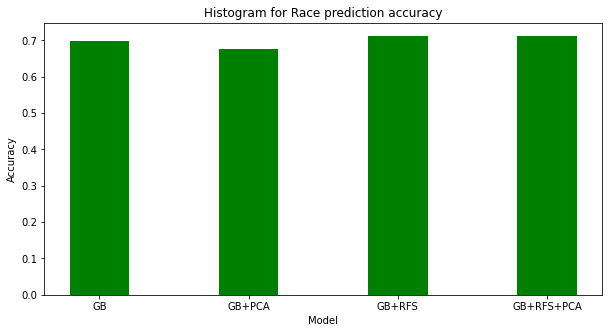

In [51]:
fig = plt.figure(figsize = (10, 5))
plt.bar(names, values, color = 'green', width=0.4)
plt.xlabel("Model")
plt.ylabel('Accuracy')
plt.title("Histogram for Race prediction accuracy")
plt.show()

* As we can see this bar graph, those accuracy are similar